In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display

In [2]:
data = pd.read_csv('mumbai_19_23.csv',parse_dates =["date"])
data.head()

,City,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,SR,BP,Xylene,AT,RF,TOT-RF,date,day,month,year
0,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,2019-01-06,1,6,2019
1,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,2019-02-06,2,6,2019
2,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,2019-03-06,3,6,2019
3,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,2019-04-06,4,6,2019
4,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,2019-05-06,5,6,2019


In [3]:
# drop the unwanted columns/features
cols_to_drop = ['City','Toluene','RF','Xylene','TOT-RF']
data = data.drop(cols_to_drop,axis=1)
# print out the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PM2_5        1324 non-null   float64       
 1   PM10         1289 non-null   float64       
 2   NO           1338 non-null   float64       
 3   NO2          1308 non-null   float64       
 4   NOx          1347 non-null   float64       
 5   NH3          1239 non-null   float64       
 6   SO2          1320 non-null   float64       
 7   CO           1326 non-null   float64       
 8   Ozone        1317 non-null   float64       
 9   Benzene      1327 non-null   float64       
 10  Eth-Benzene  1247 non-null   float64       
 11  MP-Xylene    1248 non-null   float64       
 12  RH           1343 non-null   float64       
 13  WS           1343 non-null   float64       
 14  WD           1343 non-null   float64       
 15  SR           1334 non-null   float64       
 16  BP    

In [4]:
# check for duplicated values and null values
print('Are there any duplicated values in our data ? : {}\n'.format(data.duplicated().any()))
print('The total number of null values in each colum:')
display(data.isnull().sum())

Are there any duplicated values in our data ? : False

The total number of null values in each colum:


PM2_5           76
PM10           111
NO              62
NO2             92
NOx             53
NH3            161
SO2             80
CO              74
Ozone           83
Benzene         73
Eth-Benzene    153
MP-Xylene      152
RH              57
WS              57
WD              57
SR              66
BP             999
AT              59
date             0
day              0
month            0
year             0
dtype: int64

In [5]:
# fill in the missing values with the mean of the particular column
data.fillna(value=data.mean(),inplace=True)
# let's check the data again if there are any missing values
data.isnull().any()

PM2_5          False
PM10           False
NO             False
NO2            False
NOx            False
NH3            False
SO2            False
CO             False
Ozone          False
Benzene        False
Eth-Benzene    False
MP-Xylene      False
RH             False
WS             False
WD             False
SR             False
BP             False
AT             False
date           False
day            False
month          False
year           False
dtype: bool

In [6]:
data.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,...,RH,WS,WD,SR,BP,AT,date,day,month,year
0,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,...,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645,2019-01-06,1,6,2019
1,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,...,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645,2019-02-06,2,6,2019
2,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,...,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645,2019-03-06,3,6,2019
3,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,...,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645,2019-04-06,4,6,2019
4,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,...,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645,2019-05-06,5,6,2019


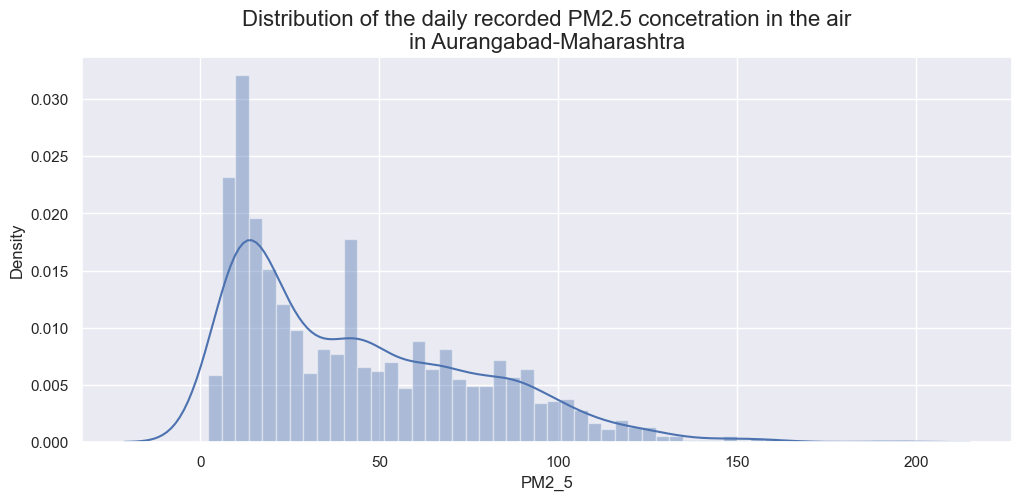

In [7]:
plt.figure(figsize=(12,5))
sns.distplot(data['PM2_5'],bins=50)
plt.title('Distribution of the daily recorded PM2.5 concetration in the air\nin Aurangabad-Maharashtra',
          fontsize=16)
plt.show()

In [8]:
import pandas as pd
import numpy as np

months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

# convert 'month' column to categorical variable with specified category order
monthly_data = data[['month','PM2_5']]
#monthly_data['month'] = pd.Categorical(monthly_data['month'], categories=months, ordered=True)

# calculate monthly median of 'PM2_5'
monthly_average = monthly_data.groupby('month')['PM2_5'].median()

# round the values to one decimal place
monthly_average = np.round(monthly_average, 1)

# convert the resulting Series to a DataFrame
monthly_average = pd.DataFrame(monthly_average)

# set the index to the categorical variable and rename the column
monthly_average.index.name = 'month'
monthly_average.columns = ['median_PM2_5']

# display the resulting DataFrame
print(monthly_average)

       median_PM2_5
month              
1              77.8
2              68.8
3              47.6
4              29.8
5              20.4
6              12.6
7              10.7
8              12.2
9              12.3
10             38.6
11             75.2
12             84.9


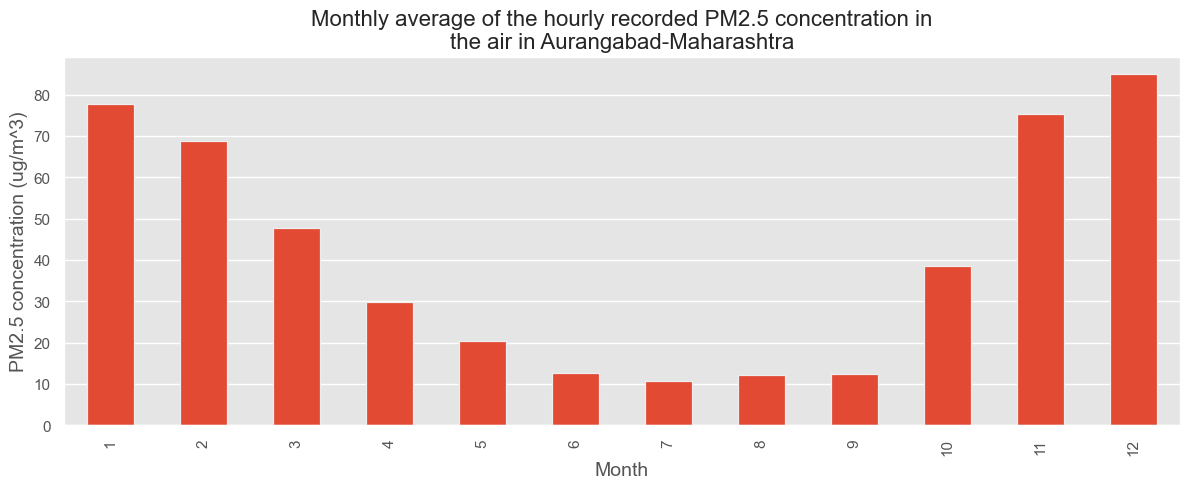

In [9]:
# plot the data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Monthly average of the hourly recorded PM2.5 concentration in\nthe air in Aurangabad-Maharashtra',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

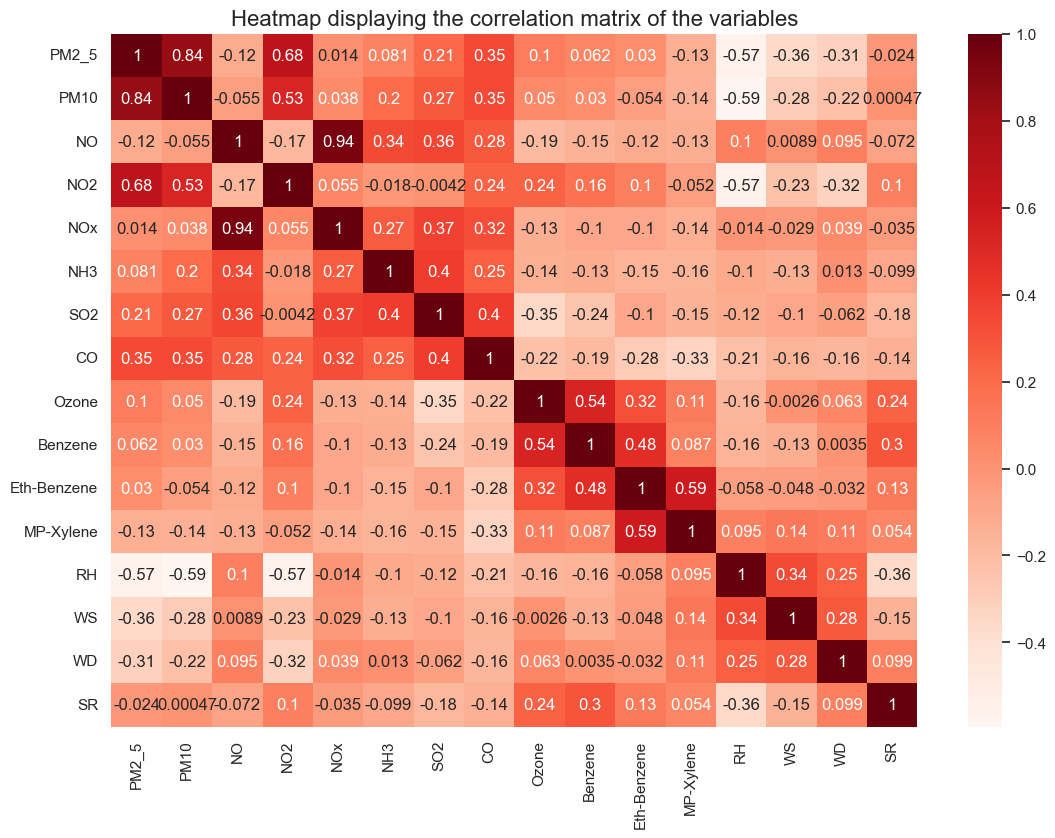

In [10]:
# let's try and visualize the relationships between the features of the data
plt.figure(figsize=(13,9))
correlation_data = data[['PM2_5', 'PM10', 'NO', 'NO2',
                         'NOx', 'NH3', 'SO2', 'CO',
                         'Ozone', 'Benzene','Eth-Benzene','MP-Xylene','RH','WS','WD','SR']]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

In [11]:
cols_to_drop = ['date','year','month','day']
newdata = data.drop(cols_to_drop,axis=1)

# calculate the variance inflation factor of each feature and detect multicollinearity
cons_data = sm.tools.add_constant(newdata)
series_before = pd.Series([variance_inflation_factor(cons_data.values,i) for i in range(cons_data.shape[1])],
                         index=cons_data.columns)
series_before

const          233566.520396
PM2_5               5.476482
PM10                4.580568
NO                 17.991610
NO2                 3.919553
NOx                17.188253
NH3                 1.479062
SO2                 1.900062
CO                  1.745204
Ozone               1.752062
Benzene             1.964903
Eth-Benzene         2.359971
MP-Xylene           1.890234
RH                  2.940956
WS                  1.431679
WD                  1.670987
SR                  1.510242
BP                  1.843380
AT                  2.112211
dtype: float64

In [12]:
newdata.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,RH,WS,WD,SR,BP,AT
0,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,9.041395,17.748293,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645
1,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,9.041395,17.748293,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645
2,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,9.041395,17.748293,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645
3,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,9.041395,17.748293,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645
4,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,9.041395,17.748293,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645


In [13]:
columns_to_drop = ['RH','WS','WD','SR',]

newdata = newdata.drop(columns_to_drop,axis=1)
cons_data2 = sm.tools.add_constant(newdata)
series_after = pd.Series([variance_inflation_factor(cons_data2.values,i) for i in range(cons_data2.shape[1])],
                         index=cons_data2.columns)
series_after

const          175611.394439
PM2_5               5.065547
PM10                3.970393
NO                 17.980553
NO2                 3.383898
NOx                17.163153
NH3                 1.455216
SO2                 1.830626
CO                  1.695953
Ozone               1.661265
Benzene             1.910495
Eth-Benzene         2.325150
MP-Xylene           1.867294
BP                  1.439417
AT                  1.287896
dtype: float64

In [14]:
newdata.columns = ['PM2_5','PM10','NO','NO2','NOx','NH3','SO2','CO','Ozone','O','Benzene','Toluene','Eth_Benzene','MP_Xylene']

# PM2.5 is skewed to the right so we log transform the values to normalize the distribution
newdata['PM2_5'] = np.log(newdata['PM2_5'])

In [15]:
mul_reg = formula.ols(formula="PM2_5 ~ PM10  + NO + NO2 + NOx + NH3 + SO2 + CO + Ozone + O + Benzene + Toluene + Eth_Benzene + MP_Xylene",
                      data=newdata).fit()
mul_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2_5   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     334.6
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:12:38   Log-Likelihood:                -832.62
No. Observations:                1400   AIC:                             1693.
Df Residuals:                    1386   BIC:                             1767.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -48.4894      4.934     -9.828      0.000     -58.168     -38.811
PM10            0.0097      0.000     33.526      0.000       0.009       0.010
NO              0.0006      0.001      0.806      0.420      -0.001       0.002
NO2             0.0170      0.001     13.214      0.000       0.014       0.019
NOx            -0.0015      0.001     -2.149      0.032      -0.003      -0.000
NH3            -0.0008      0.000     -2.532      0.011      -0.001      -0.000
SO2             0.0076      0.001      5.341      0.000       0.005       0.010
CO              0.0757      0.029      2.569      0.010       0.018       0.133
Ozone           0.0017      0.001      1.895      0.058   -6.07e-05       0.004
O              -0.0043      0.002     -1.976      0.048      -0.009   -3.25e-05
Benzene         0.0218      0.004      6.201      0.000       0.015       0.029
Toluene        -0.0057      0.001     -4.549      0.000      -0.008      -0.003
Eth_Benzene     0.0494      0.005     10.094      0.000       0.040       0.059
MP_Xylene       0.0310      0.006      4.794      0.000       0.018       0.044
==============================================================================
Omnibus:                      221.012   Durbin-Watson:                   0.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1474.178
Skew:                          -0.547   Prob(JB):                         0.00
Kurtosis:                       7.907   Cond. No.                     4.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# we split the data into predictor variables and Outcome variable
X = newdata.drop('PM2_5',axis=1)
y = newdata['PM2_5']

# we need to scale or normalize the predictor variables since they are not on the same
# scale and some of their distributions are skewed.
X_scaled =  preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.dropna(inplace=True)
# print the scaled predictor variables.
X_scaled.head()

,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,O,Benzene,Toluene,Eth_Benzene,MP_Xylene
0,-7.830866e-16,-3.054463e-16,6.913098e-16,4.041625e-16,1.620633e-16,-1.898835e-15,-1.283108e-15,1.175627e-15,-3.608266e-16,-1.406847e-15,-1.948233e-15,3.936513e-14,-2.406643e-14
1,-7.830866e-16,-3.054463e-16,6.913098e-16,4.041625e-16,1.620633e-16,-1.898835e-15,-1.283108e-15,1.175627e-15,-3.608266e-16,-1.406847e-15,-1.948233e-15,3.936513e-14,-2.406643e-14
2,-7.830866e-16,-3.054463e-16,6.913098e-16,4.041625e-16,1.620633e-16,-1.898835e-15,-1.283108e-15,1.175627e-15,-3.608266e-16,-1.406847e-15,-1.948233e-15,3.936513e-14,-2.406643e-14
3,-7.830866e-16,-3.054463e-16,6.913098e-16,4.041625e-16,1.620633e-16,-1.898835e-15,-1.283108e-15,1.175627e-15,-3.608266e-16,-1.406847e-15,-1.948233e-15,3.936513e-14,-2.406643e-14
4,-7.830866e-16,-3.054463e-16,6.913098e-16,4.041625e-16,1.620633e-16,-1.898835e-15,-1.283108e-15,1.175627e-15,-3.608266e-16,-1.406847e-15,-1.948233e-15,3.936513e-14,-2.406643e-14


In [17]:
y.head()

0    3.778017
1    3.778017
2    3.778017
3    3.778017
4    3.778017
Name: PM2_5, dtype: float64

In [18]:
# we now split out data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

# instantiate the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)   # fit the model

LinearRegression()

In [19]:
# we now score the model
print('Score on train data: {}\n'.format(lin_model.score(X_train,y_train)))
print('Score on test data: {}'.format(lin_model.score(X_test,y_test)))

Score on train data: 0.7483440962314118

Score on test data: 0.7786989229295861


In [20]:
prediction = lin_model.predict(X_test)
mse = mean_squared_error(y_test,prediction)
accuracy = r2_score(y_test,prediction)

print('Mean Squared Error: {}\n'.format(mse))
print('Overall model accuracy: {}'.format(accuracy))

Mean Squared Error: 0.18181251492046047

Overall model accuracy: 0.7786989229295861


In [21]:
ensemble_data = data.drop(cols_to_drop,axis=1)

# we split the data into predictor variables and Outcome variable
X = ensemble_data.drop('PM2_5',axis=1)
y = ensemble_data['PM2_5']

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.3)

In [23]:
# we go ahead to use the ensemble methods as the LinearRegression model has a low accuracy
# on both the test and train data.
decision_tree = DecisionTreeRegressor(max_depth=5,
                                     max_features='auto',
                                     min_samples_split=3,
                                     min_samples_leaf=2)
decision_tree.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=2,
                      min_samples_split=3)

In [24]:
# we now score the model
print('Score on train data: {}\n'.format(decision_tree.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(decision_tree.score(xtest,ytest)))

tree_pred = decision_tree.predict(xtest)
tree_mse = mean_squared_error(ytest,tree_pred)
tree_accuracy = r2_score(ytest,tree_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_mse)))
print('Overall model accuracy: {}'.format(tree_accuracy))

Score on train data: 0.879803493709949

Score on test data: 0.7725448798125716

Root Mean Squared Error: 15.291573632904752

Overall model accuracy: 0.7725448798125716


In [25]:
# We now tune the parameters of the model to see if we can increase the accuracy
params = {'max_depth':[3,4,5,6,7],
         'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9,10],
         'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}

tree = DecisionTreeRegressor()

# initialize the grid search for the best parameters
tree_search = GridSearchCV(tree,param_grid=params,
                          n_jobs=-1,cv=5)

tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [26]:
# we now score the model
print('Score on train data: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(tree_search.score(xtest,ytest)))
print('Best parameters found:')
display(tree_search.best_params_)

tree_search_pred = tree_search.predict(xtest)
tree_search_mse = mean_squared_error(ytest,tree_search_pred)
tree_search_accuracy = r2_score(ytest,tree_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_search_mse)))
print('Overall model accuracy: {}'.format(tree_search_accuracy))

Score on train data: 0.9129289554843872

Score on test data: 0.823261577466746

Best parameters found:


{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 3}

Root Mean Squared Error: 13.479376646464331

Overall model accuracy: 0.823261577466746


In [27]:
dtpredicted=tree_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Decision_tree':dtpredicted.tolist()})
df.to_excel('decision_tree.xlsx')

In [28]:
# instantiate the RandomForestRegressor model and fit the model on the training data
forest = RandomForestRegressor(n_estimators=100,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=7,
                              min_samples_leaf=3)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=7)

In [29]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.9504144676459301

Score on test data: 0.8958158373620924

Root Mean Squared Error: 10.349161739578035

Overall model accuracy: 0.8958158373620924


In [30]:
# we now tune the parameters of the RandomForestRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['n_estimators'] = [100,200,300,400,500]

# instantiate the model
random_forest = RandomForestRegressor()

# perform the grid search for the best parameters
forest_search = RandomizedSearchCV(random_forest,params,n_jobs=-1,
                                   cv=5,verbose=2)
forest_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [31]:
# we now score the model
print('Score on train data: {}\n'.format(forest_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest_search.score(xtest,ytest)))
print('Best parameters found:')
display(forest_search.best_params_)

forest_search_pred = forest_search.predict(xtest)
forest_search_mse = mean_squared_error(ytest,forest_search_pred)
forest_search_accuracy = r2_score(ytest,forest_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_search_mse)))
print('Overall model accuracy: {}'.format(forest_search_accuracy))

Score on train data: 0.909989438892713

Score on test data: 0.8863837901576004

Best parameters found:


{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 7}

Root Mean Squared Error: 10.807480739469161

Overall model accuracy: 0.8863837901576004


In [32]:
rfpredicted=forest_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from random_forest':rfpredicted.tolist()})
df.to_excel('randomforest.xlsx')

In [33]:
# instantiate the GradientBoostingRegressor model and fit the model on the training data
grad_boost = GradientBoostingRegressor(n_estimators=100,
                                      max_depth=7,
                                      max_features='auto',
                                      min_samples_split=7,
                                      min_samples_leaf=3,
                                      learning_rate=0.1)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=7, max_features='auto', min_samples_leaf=3,
                          min_samples_split=7)

In [34]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.999090006083285

Score on test data: 0.9100480219730711

Root Mean Squared Error: 9.616337129922192

Overall model accuracy: 0.9100480219730711


In [35]:
# we now tune the parameters of the GradientBoostingRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['learning_rate'] = np.linspace(0.1,1,10)

# instantiate the model
gradient_boosting = GradientBoostingRegressor()

# perform the grid search for the best parameters
gboost_search = RandomizedSearchCV(gradient_boosting,params,n_jobs=-1,
                                   cv=5,verbose=2)
gboost_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [36]:
# we now score the model
print('Score on train data: {}\n'.format(gboost_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(gboost_search.score(xtest,ytest)))
print('Best parameters found:')
display(gboost_search.best_params_)

gboost_search_pred = gboost_search.predict(xtest)
gboost_search_mse = mean_squared_error(ytest,gboost_search_pred)
gboost_search_accuracy = r2_score(ytest,gboost_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_search_mse)))
print('Overall model accuracy: {}'.format(gboost_search_accuracy))

Score on train data: 0.9910657946783612

Score on test data: 0.9264690498112842

Best parameters found:


{'n_estimators': 200,
 'min_samples_split': 7,
 'min_samples_leaf': 9,
 'max_features': 'sqrt',
 'max_depth': 5,
 'learning_rate': 0.1}

Root Mean Squared Error: 8.694395872474741

Overall model accuracy: 0.9264690498112842


In [37]:
xgpredicted=gboost_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Xgboost':xgpredicted.tolist()})
df.to_excel('Xgboost.xlsx')

In [38]:
xgpredicted.tolist()
print(len(y.tolist()),len(xgpredicted.tolist()))

1400 1400
